In [1]:
def foo(i, x=[]):
    x.append(x.append(i))
    return x

for i in range(3):
    y = foo(i)
print(y)

[0, None, 1, None, 2, None]


In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import csv

In [7]:
df = pd.read_csv('test_signals.csv', header=None,)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,9.064,6.622,4.669,3.693,3.693,3.693,4.181,4.181,5.157,6.134,...,56.915,51.056,47.150,45.685,45.685,43.732,39.825,35.919,33.966,33.966
1,0.834,-1.119,-1.607,-0.631,1.811,5.229,8.158,9.135,7.670,4.740,...,58.451,50.639,39.408,30.131,27.201,28.178,29.643,29.154,26.225,23.295


In [8]:
x = df.values[0][:]
y = df.values[1][:]
print(x.shape)

(256,)


In [9]:
np.corrcoef(x, y,)

array([[1.        , 0.98593064],
       [0.98593064, 1.        ]])

<h1>Coherence</h1>

In [42]:
from scipy import signal as sig
res, val = sig.coherence(x, y, fs=256, nfft=128,nperseg=128)
np.mean(val)

0.4135886728345919

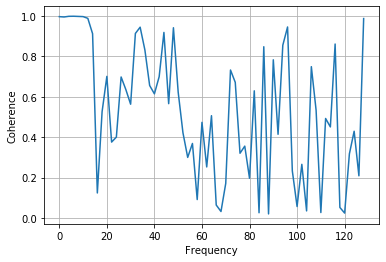

0.5358872430706961


(array([0.99688147, 0.99521875, 0.99847583, 0.9988402 , 0.99795202,
        0.99706431, 0.98839705, 0.91243207, 0.12407001, 0.52642722,
        0.70115411, 0.37594599, 0.40061843, 0.69820195, 0.63548278,
        0.56337711, 0.91364597, 0.94470839, 0.8316712 , 0.65601337,
        0.61465256, 0.69958631, 0.91870354, 0.56610363, 0.94193052,
        0.62295549, 0.42238279, 0.30009488, 0.36907471, 0.09141989,
        0.47363662, 0.25285835, 0.50653421, 0.06431863, 0.03228404,
        0.17151653, 0.73264119, 0.67177869, 0.32066988, 0.35591107,
        0.19692093, 0.62966186, 0.02611519, 0.84794503, 0.02035533,
        0.78327684, 0.41448445, 0.85548091, 0.94571921, 0.23338183,
        0.05695727, 0.26574953, 0.03529979, 0.74929429, 0.53367741,
        0.0271961 , 0.49276746, 0.45101579, 0.86129305, 0.05234431,
        0.02444277, 0.31764867, 0.42956185, 0.20903003, 0.98741915]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  3

In [36]:
import matplotlib.pyplot as plt
coh, f = plt.cohere(x, y, NFFT=128,Fs=256, sides='onesided')
plt.show()
print(np.mean(coh))
coh,f

<h1>Granger Causality</h1>
<a href='https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2#:~:text=The%20Granger%20causality%20test%20is,in%20forecasting%20another%20time%20series.'>Link</a>

In [11]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag, test = 24, 'ssr_chi2test'
test_result = grangercausalitytests(np.array([x,y]).transpose(), maxlag=maxlag, verbose=False)

In [12]:
p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
np.min(p_values)

0.0002

In [ ]:
print('p-value: ',test_result[1][0]['ssr_ftest'][1])
test_result

<h1>Phase Lag Index</h1>

In [15]:
from scipy.signal import hilbert
z_x = hilbert(x)
phi_x = np.angle(z_x)
z_y = hilbert(y)
phi_y = np.angle(z_y)

wraptopi = lambda ang : (ang + np.pi) % (2 * np.pi) - np.pi
delta_phi = wraptopi(phi_x - phi_y)

In [16]:
PLI = abs(np.mean(np.sign(delta_phi)))
PLI

0.140625

<h1>Spectral Connectivity Library</h1>

In [17]:
from spectral_connectivity import Multitaper, Connectivity

In [29]:
m = Multitaper(time_series=np.array([x,y]).transpose(),)#sampling_frequency=256)
c = Connectivity.from_multitaper(m)

In [45]:
print(c.phase_lag_index().shape)
arr = c.phase_lag_index()
sum = 0
for i in range(128):
    sum += abs(arr[0][i][0][1])
    
sum/128
c.phase_lag_index()

(1, 128, 2, 2)


array([[[[ 0. ,  0. ],
         [ 0. ,  0. ]],

        [[ 0. ,  0.6],
         [-0.6,  0. ]],

        [[ 0. ,  0.2],
         [-0.2,  0. ]],

        [[ 0. , -0.6],
         [ 0.6,  0. ]],

        [[ 0. , -0.2],
         [ 0.2,  0. ]],

        [[ 0. ,  0.2],
         [-0.2,  0. ]],

        [[ 0. ,  0.2],
         [-0.2,  0. ]],

        [[ 0. ,  0.6],
         [-0.6,  0. ]],

        [[ 0. ,  1. ],
         [-1. ,  0. ]],

        [[ 0. ,  1. ],
         [-1. ,  0. ]],

        [[ 0. ,  0.6],
         [-0.6,  0. ]],

        [[ 0. ,  0.6],
         [-0.6,  0. ]],

        [[ 0. ,  0.2],
         [-0.2,  0. ]],

        [[ 0. ,  0.6],
         [-0.6,  0. ]],

        [[ 0. ,  0.2],
         [-0.2,  0. ]],

        [[ 0. , -0.2],
         [ 0.2,  0. ]],

        [[ 0. ,  0.2],
         [-0.2,  0. ]],

        [[ 0. ,  0.2],
         [-0.2,  0. ]],

        [[ 0. , -0.2],
         [ 0.2,  0. ]],

        [[ 0. , -0.2],
         [ 0.2,  0. ]],

        [[ 0. , -0.2],
         [ 0.2,  

In [46]:
c.partial_directed_coherence()

array([[[[8.83501637e-03, 6.87104564e-05],
         [9.91164984e-01, 9.99931290e-01]],

        [[1.39279793e-02, 2.86300582e-02],
         [9.86072021e-01, 9.71369942e-01]],

        [[3.88639114e-02, 5.67015292e-02],
         [9.61136089e-01, 9.43298471e-01]],

        [[1.80153330e-01, 1.54901030e-01],
         [8.19846670e-01, 8.45098970e-01]],

        [[2.43900139e-01, 1.81623893e-01],
         [7.56099861e-01, 8.18376107e-01]],

        [[6.23587925e-02, 8.40463962e-02],
         [9.37641208e-01, 9.15953604e-01]],

        [[2.24121243e-02, 2.84524927e-02],
         [9.77587876e-01, 9.71547507e-01]],

        [[4.43780212e-02, 2.97619577e-02],
         [9.55621979e-01, 9.70238042e-01]],

        [[4.98234602e-02, 3.12632552e-02],
         [9.50176540e-01, 9.68736745e-01]],

        [[6.71708933e-02, 8.41884631e-02],
         [9.32829107e-01, 9.15811537e-01]],

        [[1.71886072e-01, 1.18461374e-01],
         [8.28113928e-01, 8.81538626e-01]],

        [[2.68289283e-02, 8.9127

In [32]:
arr = c.coherence_magnitude()
sum = 0
for i in range(64):
    sum += abs(arr[0][2*i][0][1])
    
print(sum/64)
c.coherence_magnitude()

0.5940054264823103


array([[[[       nan, 0.9971342 ],
         [0.9971342 ,        nan]],

        [[       nan, 0.99661859],
         [0.99661859,        nan]],

        [[       nan, 0.99785727],
         [0.99785727,        nan]],

        [[       nan, 0.99746092],
         [0.99746092,        nan]],

        [[       nan, 0.99877282],
         [0.99877282,        nan]],

        [[       nan, 0.99823803],
         [0.99823803,        nan]],

        [[       nan, 0.99867519],
         [0.99867519,        nan]],

        [[       nan, 0.99845533],
         [0.99845533,        nan]],

        [[       nan, 0.99663461],
         [0.99663461,        nan]],

        [[       nan, 0.9953455 ],
         [0.9953455 ,        nan]],

        [[       nan, 0.9896738 ],
         [0.9896738 ,        nan]],

        [[       nan, 0.9868503 ],
         [0.9868503 ,        nan]],

        [[       nan, 0.96450599],
         [0.96450599,        nan]],

        [[       nan, 0.92064287],
         [0.92064287,        

array([[[[ 1.        +0.j        ,  1.        +0.j        ],
         [ 1.        +0.j        ,  1.        +0.j        ]],

        [[ 1.        +0.j        ,  0.99892827+0.01179209j],
         [ 0.99892827-0.01179209j,  1.        +0.j        ]],

        [[ 1.        +0.j        ,  0.99971902+0.0071633j ],
         [ 0.99971902-0.0071633j ,  1.        +0.j        ]],

        [[ 1.        +0.j        ,  0.99720015-0.04201212j],
         [ 0.99720015+0.04201212j,  1.        +0.j        ]],

        [[ 1.        +0.j        ,  0.98454208+0.05949995j],
         [ 0.98454208-0.05949995j,  1.        +0.j        ]],

        [[ 1.        +0.j        ,  0.99878433+0.01713449j],
         [ 0.99878433-0.01713449j,  1.        +0.j        ]],

        [[ 1.        +0.j        ,  0.99460431-0.03118744j],
         [ 0.99460431+0.03118744j,  1.        +0.j        ]],

        [[ 1.        +0.j        ,  0.99432291+0.04404058j],
         [ 0.99432291-0.04404058j,  1.        +0.j        ]],

        

In [ ]:
max_lag, alpha = 10, 0.5
T = len(x)
BIC = np.zeros(max_lag,1)
RSS_R = np.zeros(max_lag,1)
for i in range(1,max_lag+1):
    ystar = x[i+1:T]
    

In [ ]:
def granger_caus(x,y,alpha,max_lag):
    if(len(x)!=len(y)):
        return -1
    if max_lag<1:
        return -1
    T = len(x)
    BIC = np.zeros(max_lag,1)
    RSS_R = np.zeros(max_lag,1)
    for i in range(1,max_lag+1):
        ystar = x(i+1:T,:)
        xstar = [ones(T-i,1) zeros(T-i,i)]

In [ ]:


i = 1;
while i <= max_lag
    ystar = x(i+1:T,:);
    xstar = [ones(T-i,1) zeros(T-i,i)];
    %Populate the xstar matrix with the corresponding vectors of lags
    j = 1;
    while j <= i
        xstar(:,j+1) = x(i+1-j:T-j);
        j = j+1;
    end
    %Apply the regress function. b = betahat, bint corresponds to the 95%
    %confidence intervals for the regression coefficients and r = residuals
    [b,bint,r] = regress(ystar,xstar);
    
    %Find the bayesian information criterion
    BIC(i,:) = T*log(r'*r/T) + (i+1)*log(T);
    
    %Put the restricted residual sum of squares in the RSS_R vector
    RSS_R(i,:) = r'*r;
    
    i = i+1;
    
end

[dummy,x_lag] = min(BIC);

%First find the proper model specification using the Bayesian Information
%Criterion for the number of lags of y

BIC = zeros(max_lag,1);

%Specify a matrix for the unrestricted RSS
RSS_U = zeros(max_lag,1);

i = 1;
while i <= max_lag
    
    ystar = x(i+x_lag+1:T,:);
    xstar = [ones(T-(i+x_lag),1) zeros(T-(i+x_lag),x_lag+i)];
    %Populate the xstar matrix with the corresponding vectors of lags of x
    j = 1;
    while j <= x_lag
        xstar(:,j+1) = x(i+x_lag+1-j:T-j,:);
        j = j+1;
    end
    %Populate the xstar matrix with the corresponding vectors of lags of y
    j = 1;
    while j <= i
        xstar(:,x_lag+j+1) = y(i+x_lag+1-j:T-j,:);
        j = j+1;
    end
    %Apply the regress function. b = betahat, bint corresponds to the 95%
    %confidence intervals for the regression coefficients and r = residuals
    [b,bint,r] = regress(ystar,xstar);
    
    %Find the bayesian information criterion
    BIC(i,:) = T*log(r'*r/T) + (i+1)*log(T);
    
    RSS_U(i,:) = r'*r;
    
    i = i+1;
    
end

[dummy,y_lag] =min(BIC);

%The numerator of the F-statistic
F_num = ((RSS_R(x_lag,:) - RSS_U(y_lag,:))/y_lag);

%The denominator of the F-statistic
F_den = RSS_U(y_lag,:)/(T-(x_lag+y_lag+1));

%The F-Statistic
F = F_num/F_den;

c_v = finv(1-alpha,y_lag,(T-(x_lag+y_lag+1)));